# Medical Insurance Cost Prediction

## Dataset Overview:
The medical insurance dataset encompasses various factors influencing medical expenses, such as age, sex, BMI, smoking status, number of children, and region. This dataset serves as a foundation for training machine learning models capable of forecasting medical expenses for new policyholders. Its purpose is to shed light on the pivotal elements contributing to increased insurance costs, aiding the company in making more informed decisions concerning pricing and risk assessment.

The dataset comprises 2.7K rows and 7 columns, including:

- Age
- Sex
- BMI (Body Mass Index)
- Children
- Smoker
- Region
- Charges

Dataset obtained from [Kaggle](https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction)




### Suggested Problem Statement:

- What are the primary factors influencing medical expenses?
- How accurate are machine learning models in predicting medical - expenses?

In [54]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# Read the CSV file into a DataFrame
insurance = pd.read_csv("medical_insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [ ]:
insurance.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Data Analysis

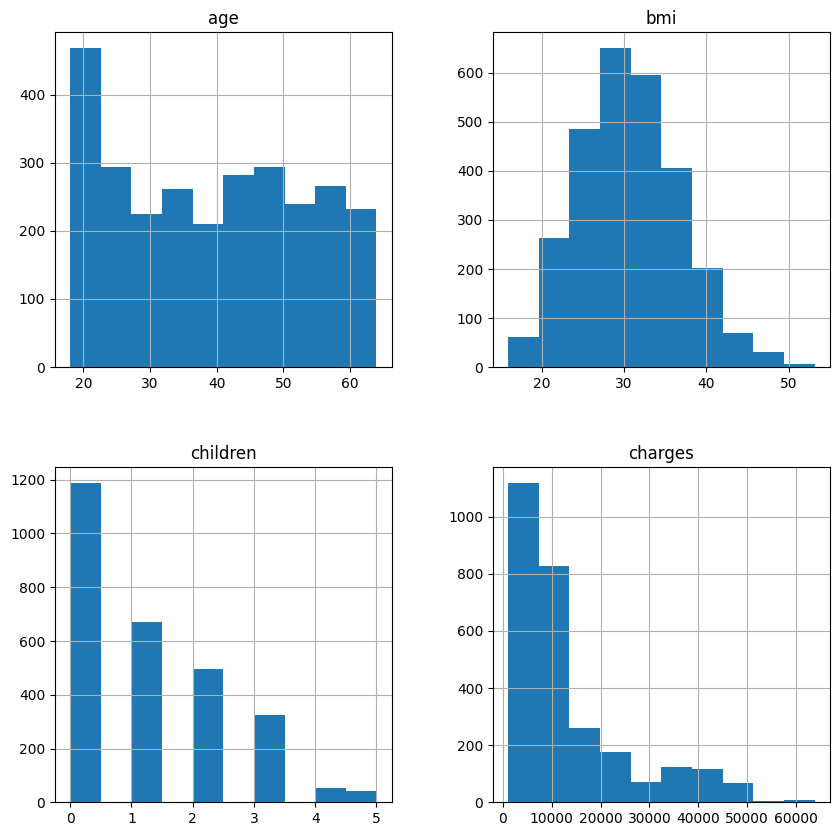

In [ ]:
# Check distribution of numerical features
insurance.hist(figsize=(10,10))
plt.show()

In [ ]:
num_df = insurance[["age","bmi","children", "charges"]]
num_df.corr()

,age,bmi,children,charges
age,1.000000,0.113048,0.037574,0.298624
bmi,0.113048,1.000000,-0.001492,0.199846
children,0.037574,-0.001492,1.000000,0.066442
charges,0.298624,0.199846,0.066442,1.000000


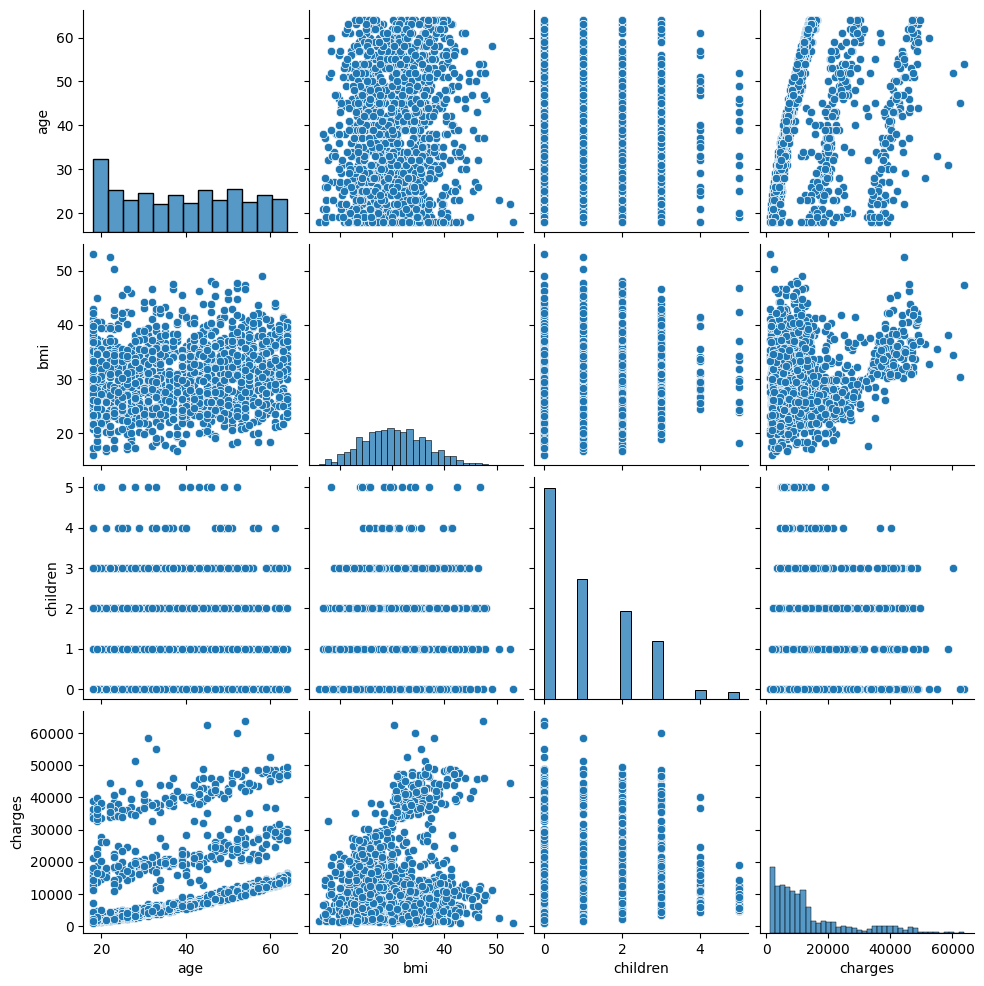

In [ ]:
sns.pairplot(data=insurance)

In [ ]:
# Age showed some interesting relationship to explore.

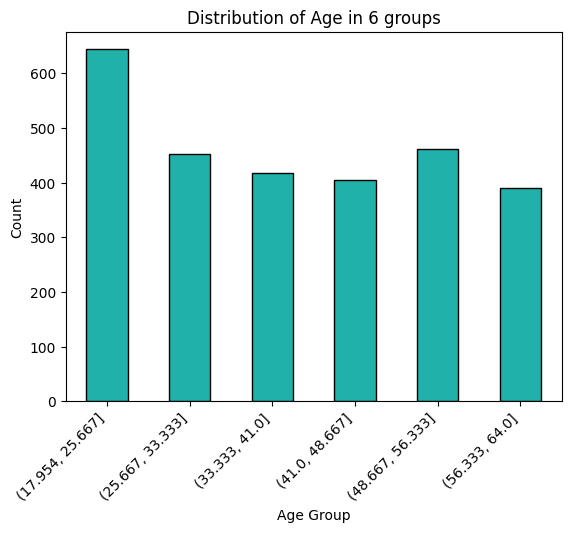

In [ ]:
# Create the age bins
age_bins = pd.cut(insurance["age"], bins=6)

# Count the occurrences of each age group
age_group_counts = age_bins.value_counts().sort_index()

# Plot the age distribution with bars sorted by age
age_group_counts.plot.bar(color="LightSeaGreen", edgecolor="black")

plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Distribution of Age in 6 groups")
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
# Categorical: sex, smoker, region

In [ ]:
# sex
gender = insurance["sex"].value_counts(normalize = True)
gender

sex
male      0.507215
female    0.492785
Name: proportion, dtype: float64

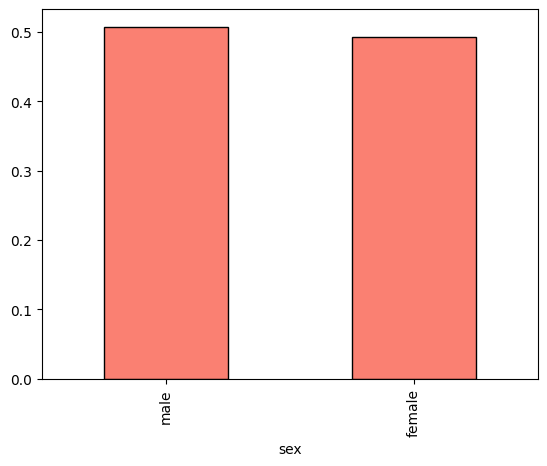

In [ ]:
# sex
gender.plot.bar(color = "Salmon", edgecolor="black")
plt.show()

<ipython-input-13-6658cef1a6b8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=insurance, x='sex', y='charges', palette = "Reds", edgecolor="black")


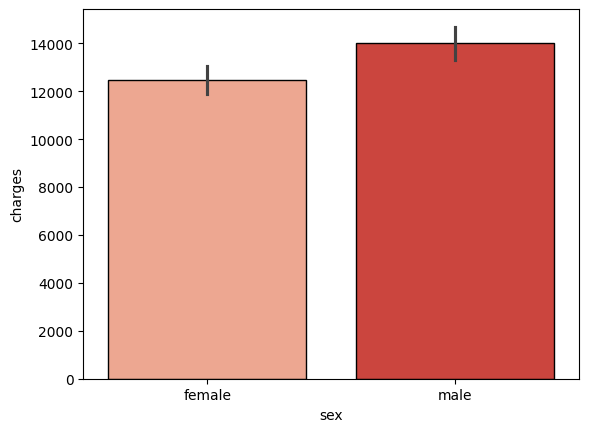

In [ ]:
# sex vs charges
sns.barplot(data=insurance, x='sex', y='charges', palette = "Reds", edgecolor="black")
plt.show()

<ipython-input-14-079dba2ca156>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=insurance, x='sex', y='charges', palette = "Reds")


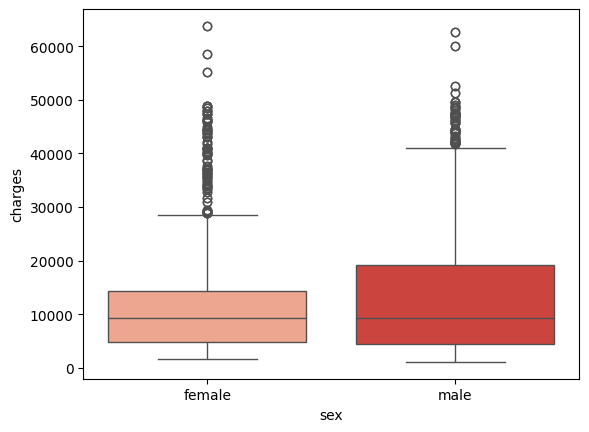

In [ ]:
sns.boxplot(data=insurance, x='sex', y='charges', palette = "Reds")
plt.show()

In [ ]:
# smoker
smoker = insurance["smoker"].value_counts(normalize = True)
smoker

smoker
no     0.796537
yes    0.203463
Name: proportion, dtype: float64

<ipython-input-16-a0340db7de95>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=insurance, x='smoker', y='charges', palette = "Purples")


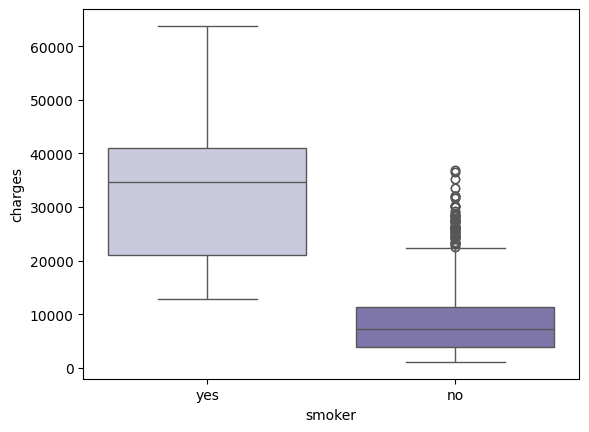

In [ ]:
# smoker vs charges
sns.boxplot(data=insurance, x='smoker', y='charges', palette = "Purples")
plt.show()

In [ ]:
# region
region = insurance["region"].value_counts()
region

region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64

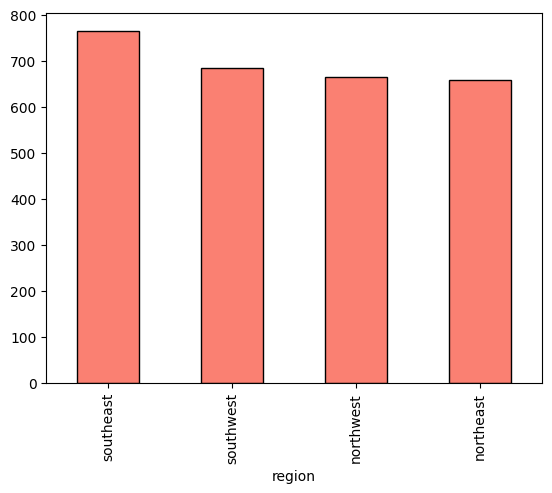

In [ ]:
region.plot.bar(color="Salmon", edgecolor="black")
plt.show()

<ipython-input-19-b0b3984f4ef4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=insurance, x ='region', y='charges', palette = "Reds")


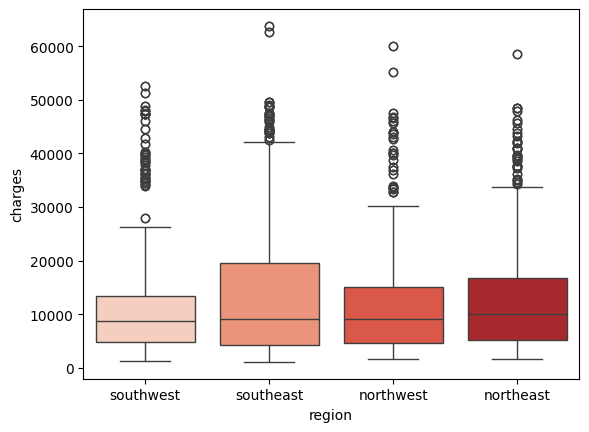

In [ ]:
sns.boxplot(data=insurance, x ='region', y='charges', palette = "Reds")
plt.show()

## Data Pre-processing
- Handling Categorical Features
- Split into Train and Test sets
- Scaling

In [ ]:
# copy the DataFrame
insurance2 = insurance.copy()

In [ ]:
# Handling Categorical Features
insurance2["region"] = insurance2["region"].replace({"northeast": 0, "northwest": 1, "southwest": 2, "southeast": 3})
insurance2["sex"] = insurance2["sex"].replace({"male": 0, "female": 1})
insurance2["smoker"] = insurance2["smoker"].replace({"no": 0, "yes": 1})

In [ ]:
insurance2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,3,1725.55230
2,28,0,33.000,3,0,3,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


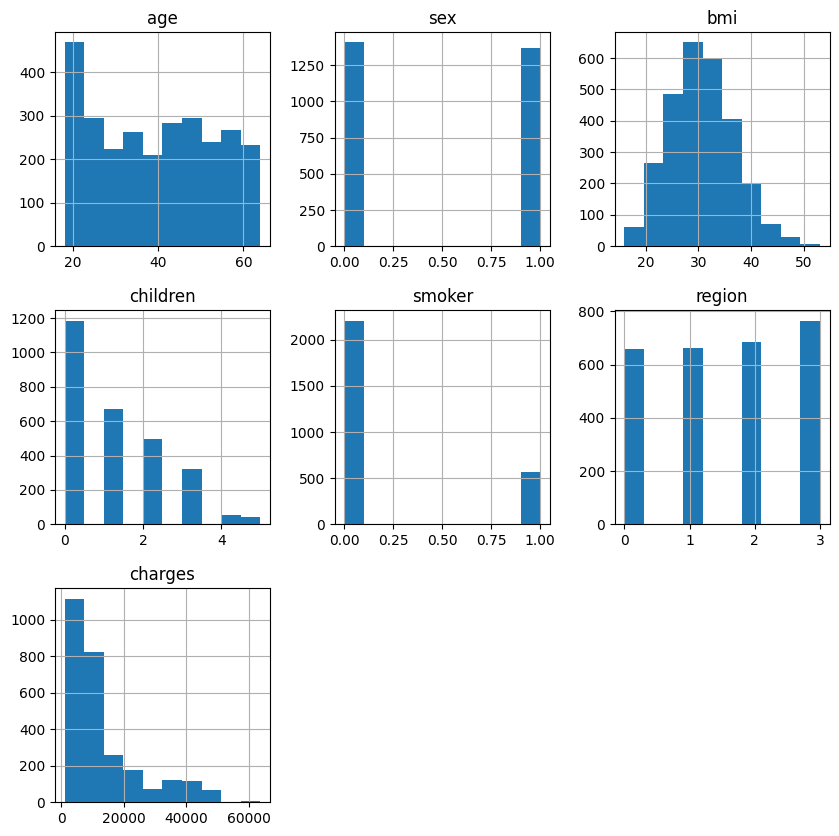

In [ ]:
insurance2.hist(figsize=(10,10))
plt.show()

In [32]:
# Define X and y and reshape it
X = insurance2.drop("charges", axis = 1).values
y = insurance2["charges"].values

# Reshape the data to meet the model's requirement
X = X.reshape(-1, X.shape[1])

In [35]:
# Split into train and test set
# 20% of the data goes to test set
# random_state assigned to 42 to get reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42 )

In [36]:
# Scaling - normalise train and test sets
# Instantiate the scaler
scaler = MinMaxScaler()

# Fit the scaler and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)

### Data Modelling

In [37]:
# Modelling
# Create an instance of Linear Regression model
linreg = LinearRegression()

# Fit the model
linreg.fit(X_train, y_train)

# Make predictions
predictions = linreg.predict(X_test)

In [38]:
print('Intercept: \n', linreg.intercept_)
print('Coefficients: \n', linreg.coef_)

Intercept: 
 -11596.917256854496
Coefficients: 
 [  254.30189671    72.16487594   327.85717299   451.11707054
 23899.62903856  -409.25260469]


In [48]:
# Create a DataFrame for coefficients
coefficients_df = pd.DataFrame({'Features': insurance2.columns[:6], 'Coefficients': linreg.coef_.flatten()})
coefficients_df

,Features,Coefficients
0,age,254.301897
1,sex,72.164876
2,bmi,327.857173
3,children,451.117071
4,smoker,23899.629039
5,region,-409.252605


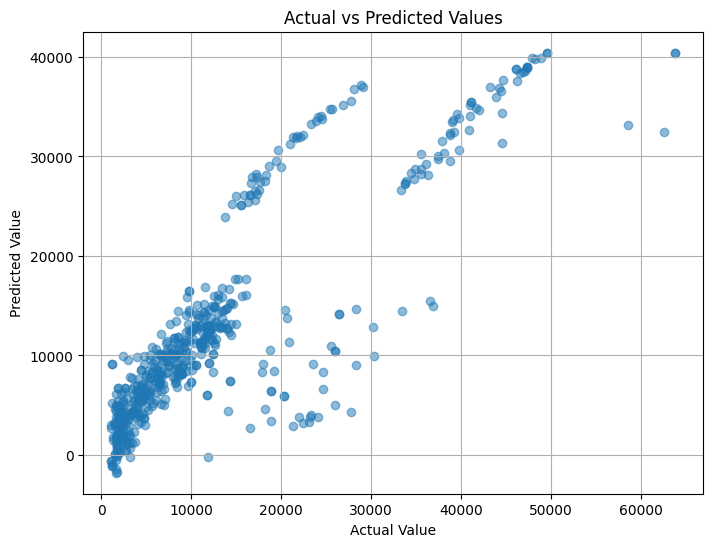

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.grid(True)
plt.show()

In [52]:
# R-squared score
R2 = linreg.score(X_test, y_test)
print (f"R2 Score: {R2}")

R2 Score: 0.7395439728031499


In [53]:
MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared = False)

print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")

Mean Absolute Error: 4158.6650710659615
Mean Squared Error: 39975040.35645014
Root Mean Squared Error: 6322.581779340631


### Suggested Problem Statement:

1. What are the primary factors influencing medical expenses?
2. How accurate are machine learning models in predicting medical - expenses?

- Answers:

1. According to the multiple regression model, being a smoker has the highest impact on charges (the charge is increased by 23899.63 compared to non-smokers). The number of children is shown as the second most important factor (charges increase by 451.12 per child), and BMI is third (charges increase by 327.86 per unit of BMI). Age also appears to be an important factor in determining insurance charges, with an increase of 254.30 per unit increase in age.

2. In this case, the R2 score is approximately 0.74, which means that your model explains about 74% of the variability in the insurance charges. Thus, this can be considered a good performance.